<a href="https://colab.research.google.com/github/szh141/colab/blob/main/pixel_classifier_using_ML_segmentation_vs_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K means segmentation
https://www.youtube.com/watch?v=6CqRnx6Ic48

https://github.com/bnsreenu/python_for_microscopists/blob/master/images/BSE_Image.jpg

pixel classifier
https://www.youtube.com/watch?v=6yW31TT6-wA

https://github.com/bnsreenu/python_for_microscopists/blob/master/images/Train_images/Sandstone_Versa0000.tif

(1024, 996)

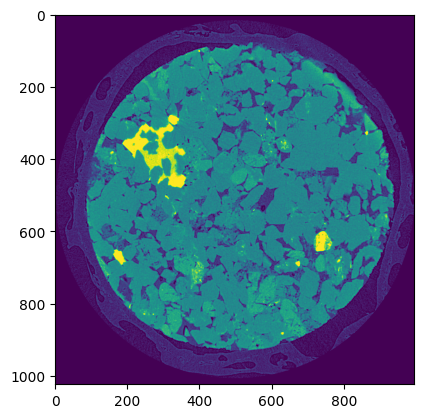

In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
img = io.imread('/content/Sandstone_Versa0000.tif')
plt.imshow(img)
img.shape

compared to the youtube tutorial, the outer dark blue ring is manually labeled to the background.

Here I will mask out the outer ring, set the outer background to grey value 50 as measured by Fiji.

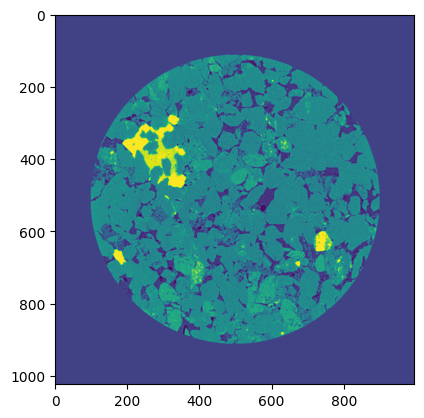

In [48]:
center = (img.shape[0]/2,img.shape[1]/2)
x,y = np.meshgrid(range(img.shape[1]),range(img.shape[0]))
mask = np.sqrt((x-center[1])**2 + (y-center[0])**2)<400
mask_img = mask*img
mask_img[mask == 0] = 50
plt.imshow(mask_img)

In [49]:
img2 = mask_img.reshape(-1,1)
img2.shape

(1019904, 1)

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(img2)


"""
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_
"""

'\nkmeans.predict([[0, 0], [12, 3]])\nkmeans.cluster_centers_\n'

In [51]:
kmeans.cluster_centers_

# 4x3 matrix
# 4 centers in 3 channels
# the value is intensity

array([[ 49.66795694],
       [135.24801113],
       [239.82263763],
       [112.65727791]])

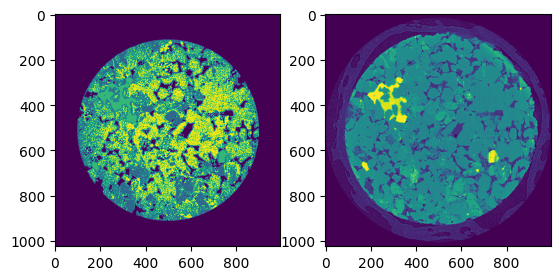

In [89]:
res = kmeans.labels_.reshape(img.shape)
plt.subplot(121)
plt.imshow(res)
plt.subplot(122)
plt.imshow(img)

The brightest pixels 255, the yellow in the original image, has more brightest pixels in the segmentation. K means isn't working the best. We will resort to supervised ML segmentation.